# Disease Risk Prediction from Lifestyle Factors

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets


### 1. Data Loading & Quick Overview

In [31]:
df = pd.read_csv("health_lifestyle_classification.csv")

In [8]:
df.head()

,survey_code,age,gender,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,...,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage,target
0,1,56,Male,173.416872,56.886640,18.915925,18.915925,56.747776,18.989117,72.165130,...,High,5,Moderate,No,Yes,0,1.0,5.5,-2.275502,healthy
1,2,69,Female,163.207380,97.799859,36.716278,36.716278,110.148833,36.511417,85.598889,...,High,5,High,Yes,No,0,1.0,5.5,6.239340,healthy
2,3,46,Male,177.281966,80.687562,25.673050,25.673050,77.019151,25.587429,90.295030,...,High,4,Moderate,No,No,0,1.0,5.5,5.423737,healthy
3,4,32,Female,172.101255,63.142868,21.318480,21.318480,63.955440,21.177109,100.504211,...,High,1,NaN,No,Yes,0,1.0,5.5,8.388611,healthy
4,5,60,Female,163.608816,40.000000,14.943302,14.943302,44.829907,14.844299,69.021150,...,High,1,High,Yes,Yes,0,1.0,5.5,0.332622,healthy


### 2. Shape & Features

In [9]:
print(f"Dataset shape: {df.shape}")

# Display all column names
print("\nFeature Names:")
print(df.columns.tolist())

Dataset shape: (100000, 48)

Feature Names:
['survey_code', 'age', 'gender', 'height', 'weight', 'bmi', 'bmi_estimated', 'bmi_scaled', 'bmi_corrected', 'waist_size', 'blood_pressure', 'heart_rate', 'cholesterol', 'glucose', 'insulin', 'sleep_hours', 'sleep_quality', 'work_hours', 'physical_activity', 'daily_steps', 'calorie_intake', 'sugar_intake', 'alcohol_consumption', 'smoking_level', 'water_intake', 'screen_time', 'stress_level', 'mental_health_score', 'mental_health_support', 'education_level', 'job_type', 'occupation', 'income', 'diet_type', 'exercise_type', 'device_usage', 'healthcare_access', 'insurance', 'sunlight_exposure', 'meals_per_day', 'caffeine_intake', 'family_history', 'pet_owner', 'electrolyte_level', 'gene_marker_flag', 'environmental_risk_score', 'daily_supplement_dosage', 'target']


### 3. Data Types & Missing Values

In [10]:
df.dtypes

survey_code                   int64
age                           int64
gender                       object
height                      float64
weight                      float64
bmi                         float64
bmi_estimated               float64
bmi_scaled                  float64
bmi_corrected               float64
waist_size                  float64
blood_pressure              float64
heart_rate                  float64
cholesterol                 float64
glucose                     float64
insulin                     float64
sleep_hours                 float64
sleep_quality                object
work_hours                  float64
physical_activity           float64
daily_steps                 float64
calorie_intake              float64
sugar_intake                float64
alcohol_consumption          object
smoking_level                object
water_intake                float64
screen_time                 float64
stress_level                  int64
mental_health_score         

In [ ]:



missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
missing_percent = missing_percent[missing_percent > 0]
print("Features with missing values:\n", missing_percent)


Features with missing values:
 alcohol_consumption    42.387
caffeine_intake        33.261
exercise_type          24.969
insulin                15.836
heart_rate             14.003
gene_marker_flag       10.474
income                  8.470
daily_steps             8.329
blood_pressure          7.669
dtype: float64


### 4. Summary Statistics & Outlier Detection

In [5]:
df.describe()

,survey_code,age,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,blood_pressure,...,water_intake,screen_time,stress_level,mental_health_score,income,meals_per_day,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,92331.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,91530.000000,100000.000000,100000.0,89526.0,100000.0,100000.000000
mean,50000.500000,48.525990,170.023707,70.064862,24.493876,24.493876,73.481627,24.494140,84.933043,119.980149,...,2.006373,6.021525,4.991600,5.004680,4038.127284,2.998720,0.0,1.0,5.5,0.015726
std,28867.657797,17.886768,9.982798,14.693667,5.951069,5.951069,17.853206,5.954184,12.040314,15.015503,...,0.688868,2.933835,3.154997,3.164228,1930.025678,1.414786,0.0,0.0,0.0,5.764489
min,1.000000,18.000000,140.000000,40.000000,9.988495,9.988495,29.965484,9.893845,34.093185,59.128168,...,0.500000,0.000000,0.000000,0.000000,500.000000,1.000000,0.0,1.0,5.5,-9.999895
25%,25000.750000,33.000000,163.306615,59.856938,20.271405,20.271405,60.814215,20.271059,76.795185,109.812060,...,1.532011,3.971318,2.000000,2.000000,2665.402843,2.000000,0.0,1.0,5.5,-4.980501
50%,50000.500000,48.000000,170.016778,69.924141,24.156734,24.156734,72.470201,24.151699,84.957139,119.951794,...,2.000659,5.991171,5.000000,5.000000,4004.601345,3.000000,0.0,1.0,5.5,0.015589
75%,75000.250000,64.000000,176.728920,80.027418,28.258696,28.258696,84.776088,28.247648,93.018713,130.120621,...,2.473047,8.024470,8.000000,8.000000,5360.012694,4.000000,0.0,1.0,5.5,5.008424
max,100000.000000,79.000000,210.000000,139.250894,59.234792,59.234792,177.704377,59.142646,133.153631,184.439195,...,5.000000,16.000000,10.000000,10.000000,12029.409353,5.000000,0.0,1.0,5.5,9.999966


### 5. Univariate Analysis and Bivariate Analysis

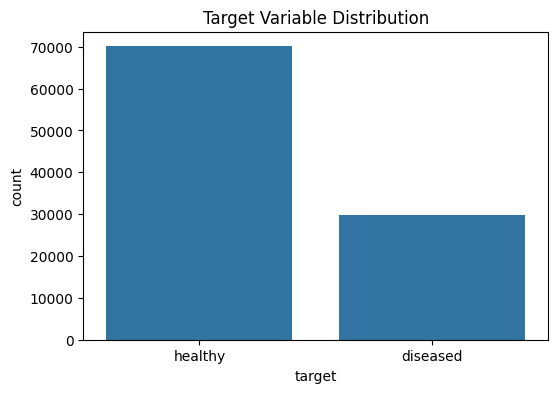

Class balance:
 target
healthy     0.70097
diseased    0.29903
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df)
plt.title('Target Variable Distribution')
plt.show()

print("Class balance:\n", df['target'].value_counts(normalize=True))

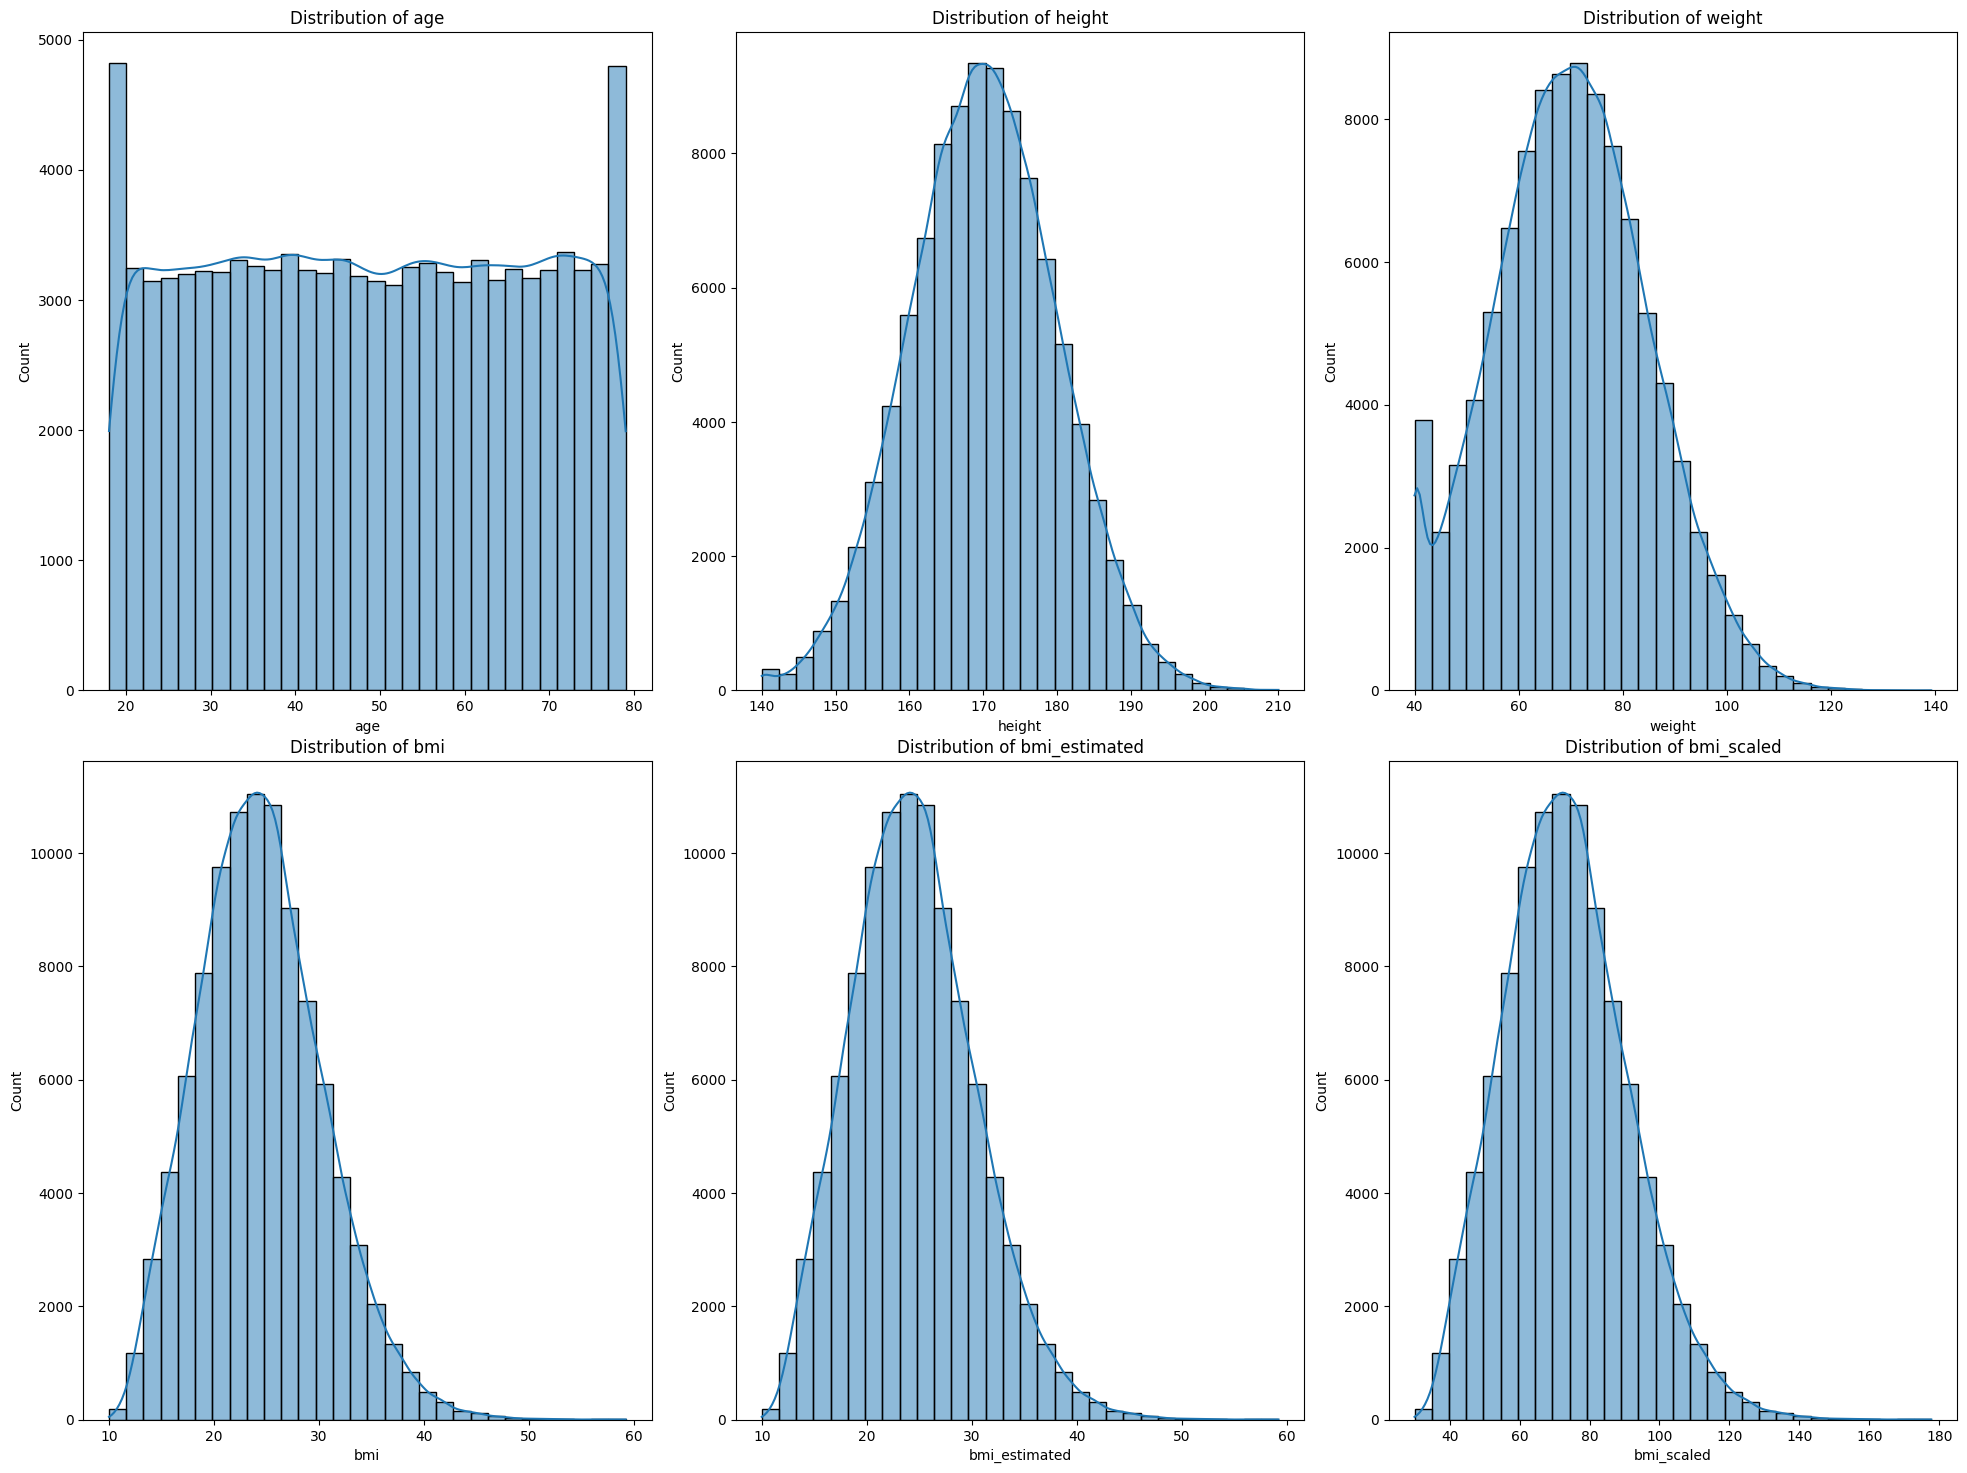

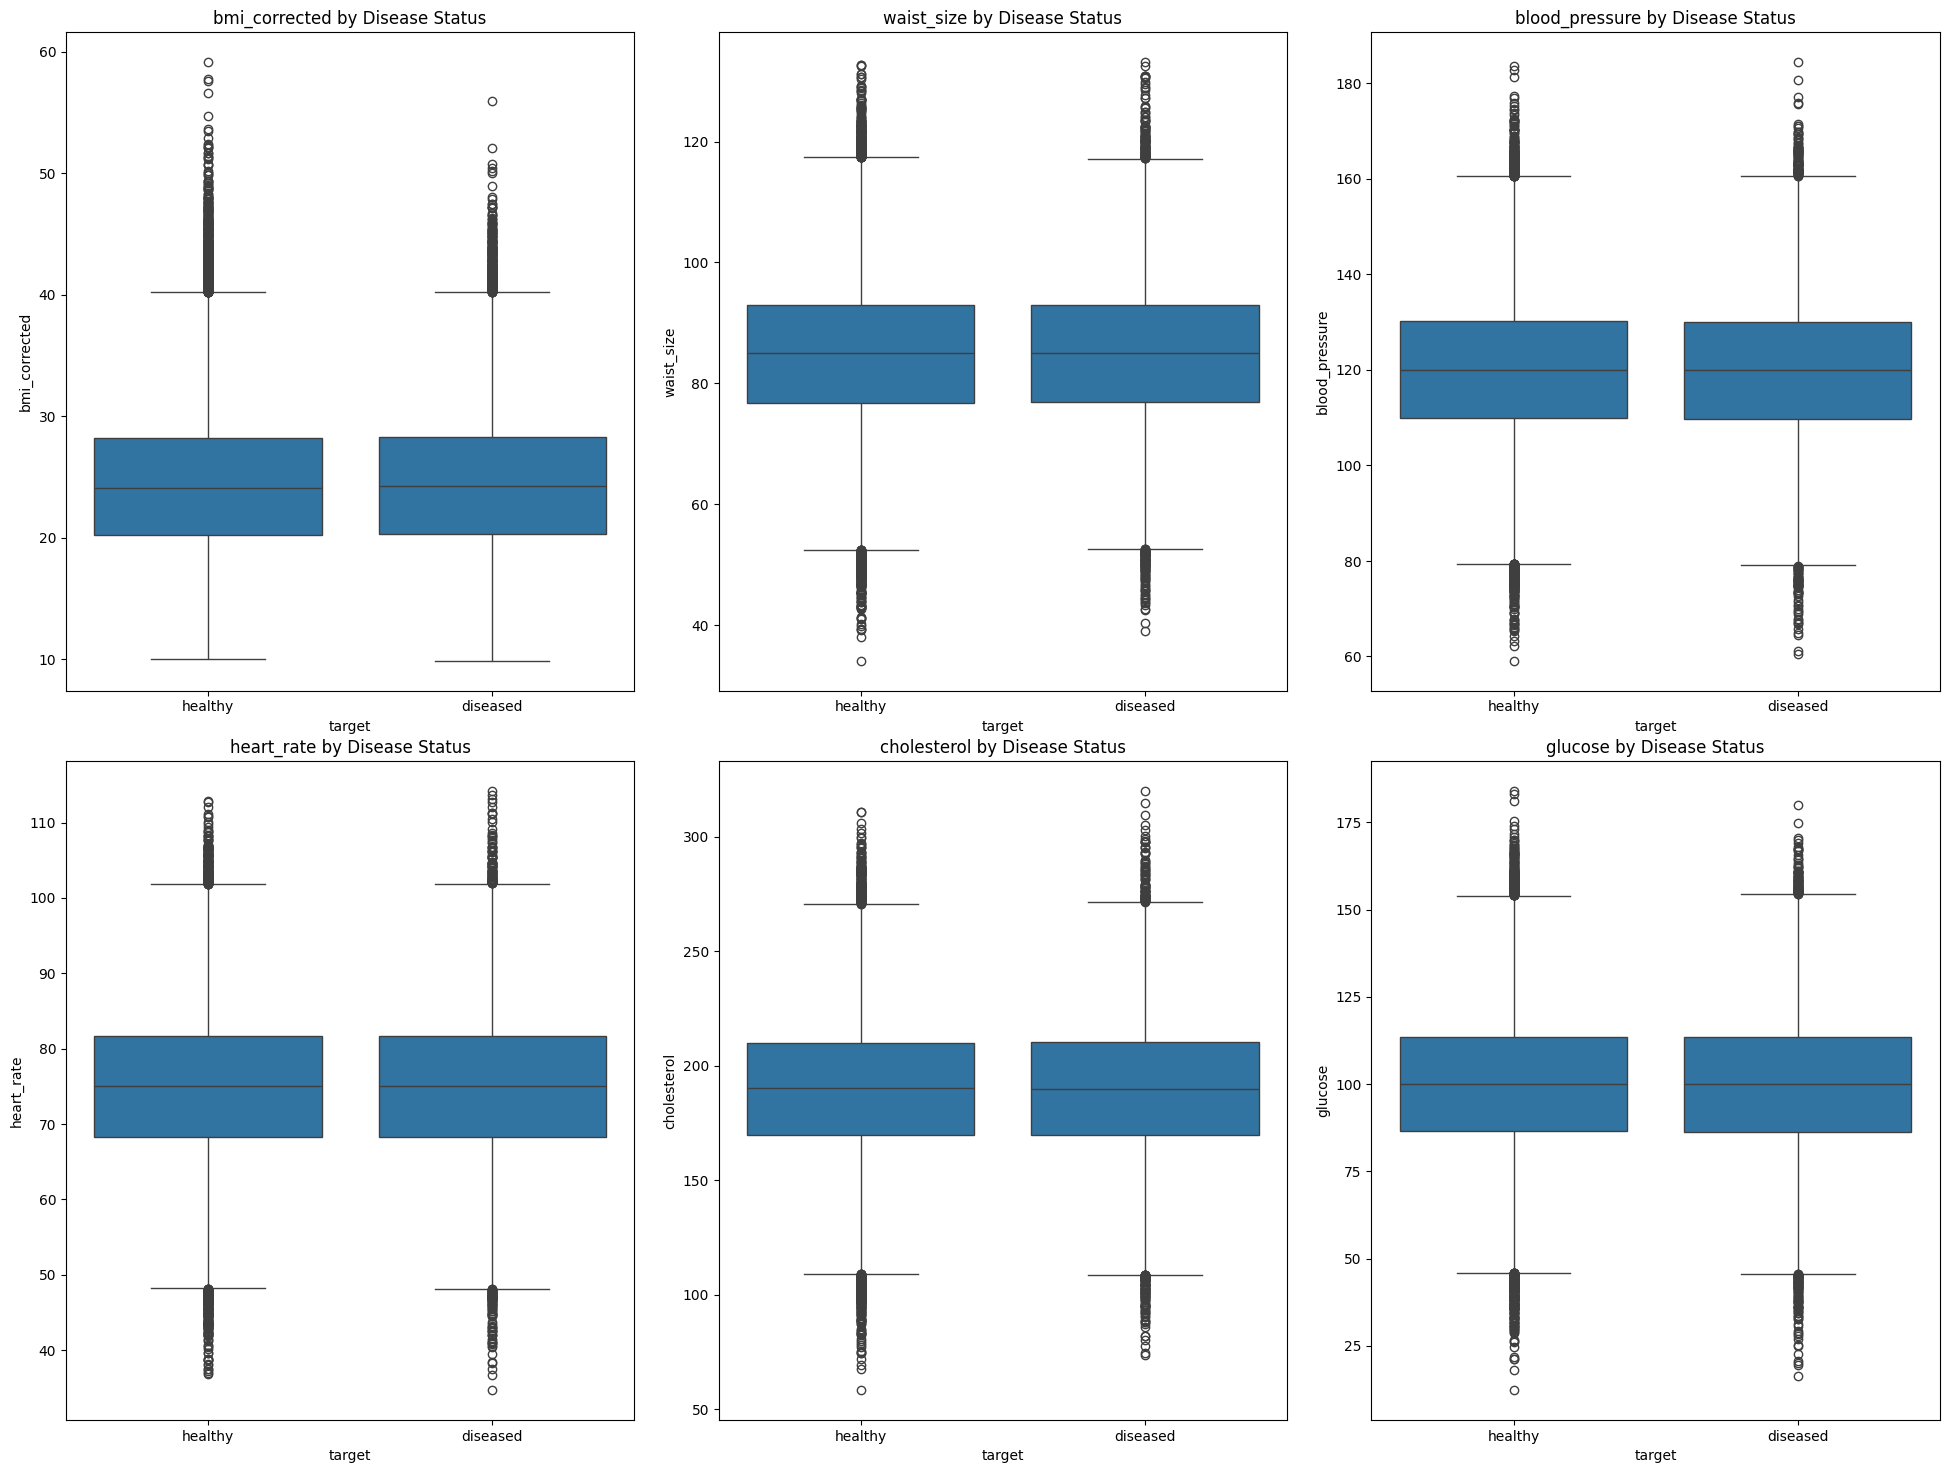

In [26]:
def plot_grid(rows, cols, figsize=(20, 15)):
    """Create a grid of subplots with shared axes where appropriate"""
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    plt.tight_layout(pad=3.0)
    return fig, axes

num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
num_cols.remove('survey_code')  

fig, axes = plot_grid(2, 3)
axes = axes.ravel()  

for i, col in enumerate(num_cols[:6]):  
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.show()

fig, axes = plot_grid(2, 3)
axes = axes.ravel()  

for i, col in enumerate(num_cols[6:12]):  
    sns.boxplot(x='target', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} by Disease Status')

plt.show()

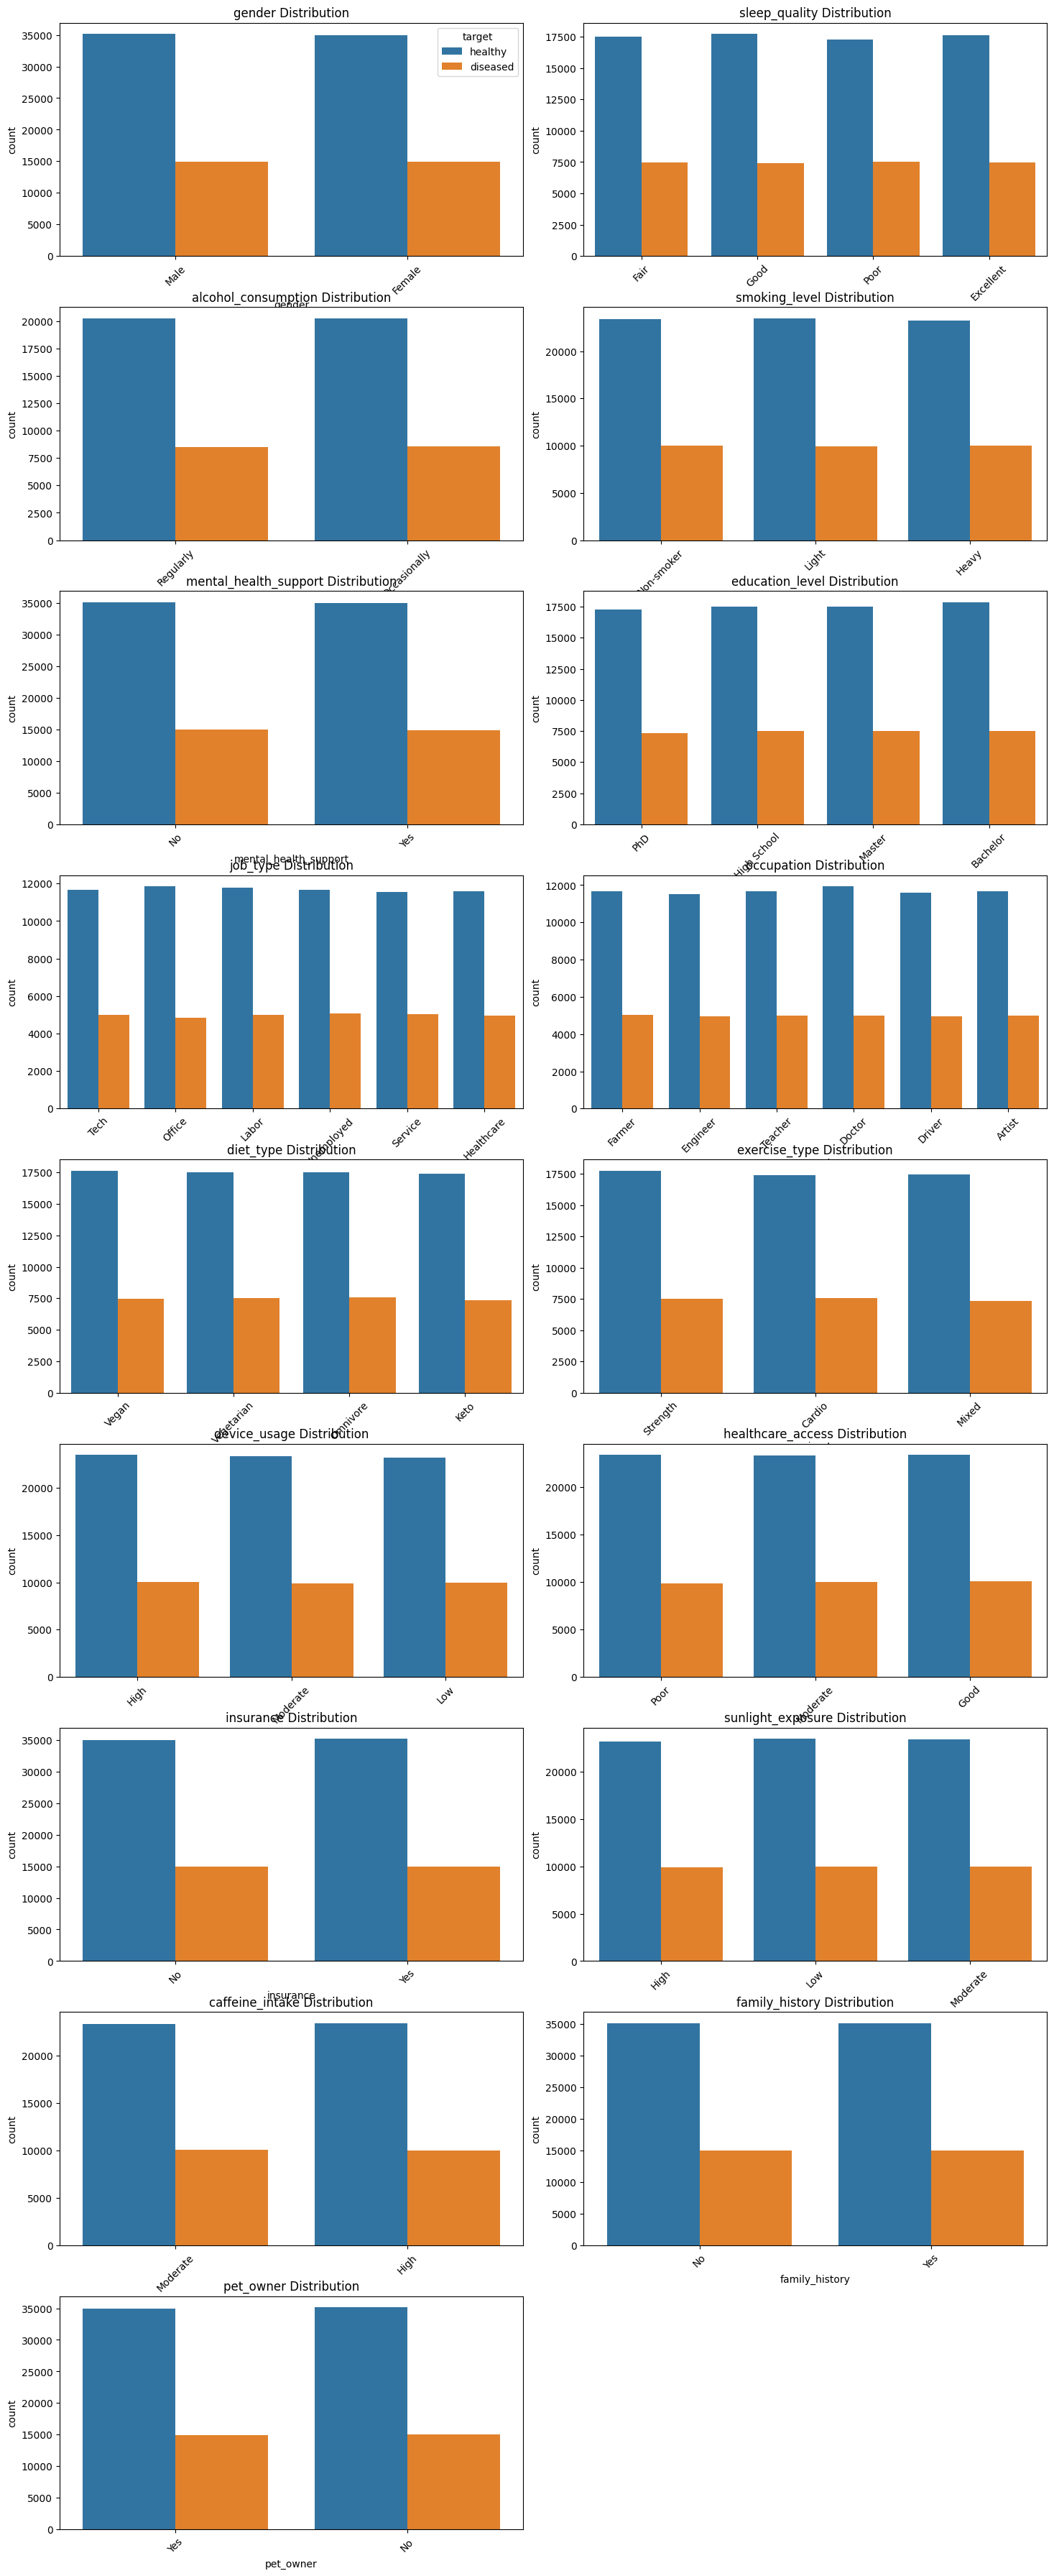

In [25]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('target')  

n_cols = 2  
n_rows = (len(cat_cols) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
plt.tight_layout(pad=3.0)

if n_rows > 1:
    axes = axes.ravel()
else:
    axes = [axes] if n_cols == 1 else axes

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, hue='target', data=df, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')
    axes[i].tick_params(axis='x', rotation=45)
    
    if i > 0:
        axes[i].get_legend().remove()

for j in range(i+1, n_rows*n_cols):
    axes[j].axis('off')

plt.show()

### 6. Multivariate Analysis

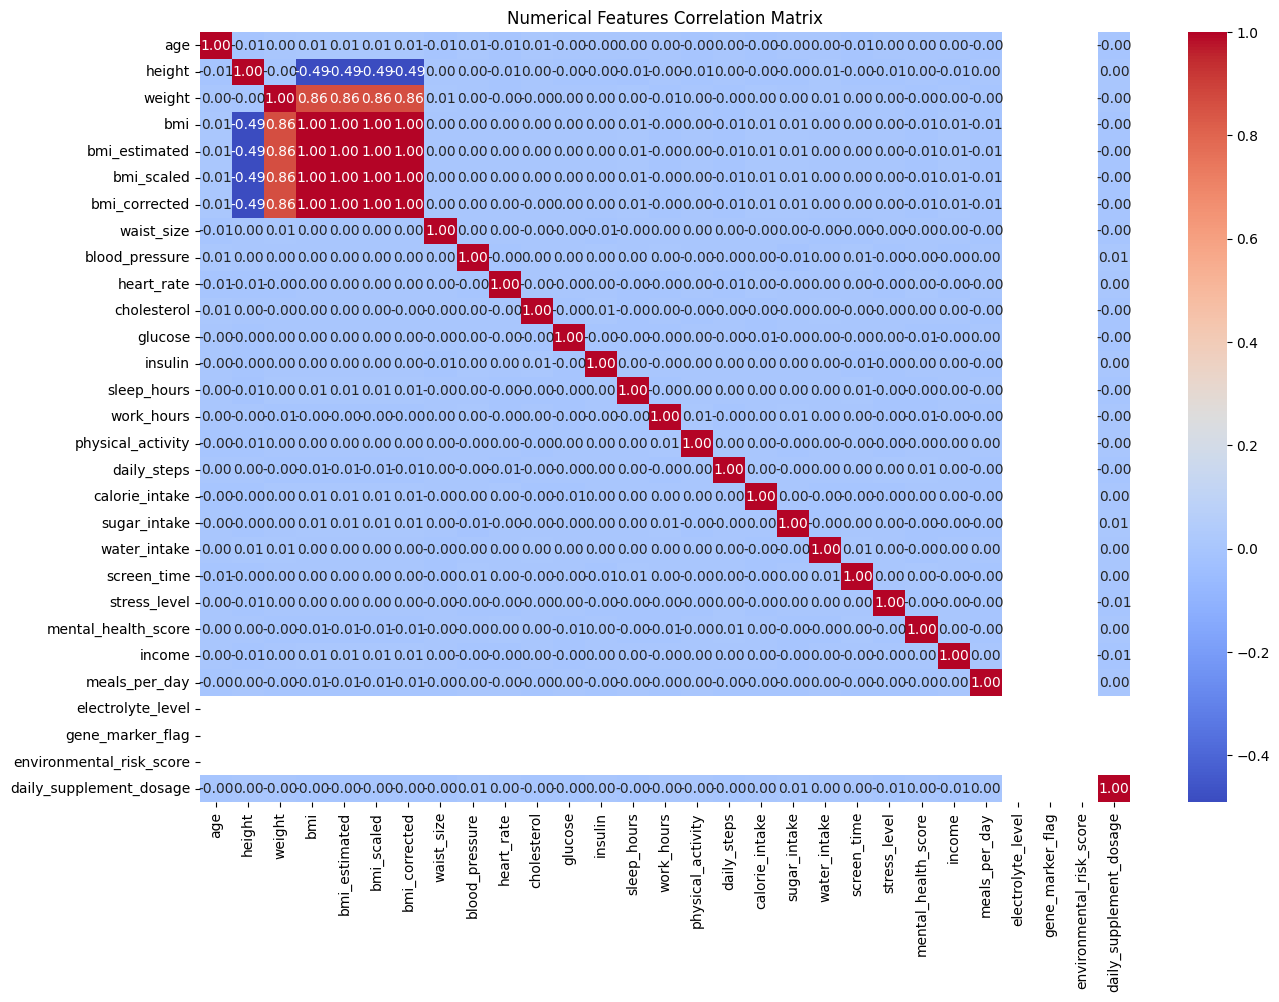

In [23]:
# Numerical feature correlation
plt.figure(figsize=(15,10))
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Numerical Features Correlation Matrix')
plt.show()

# Pairplot for top correlated features




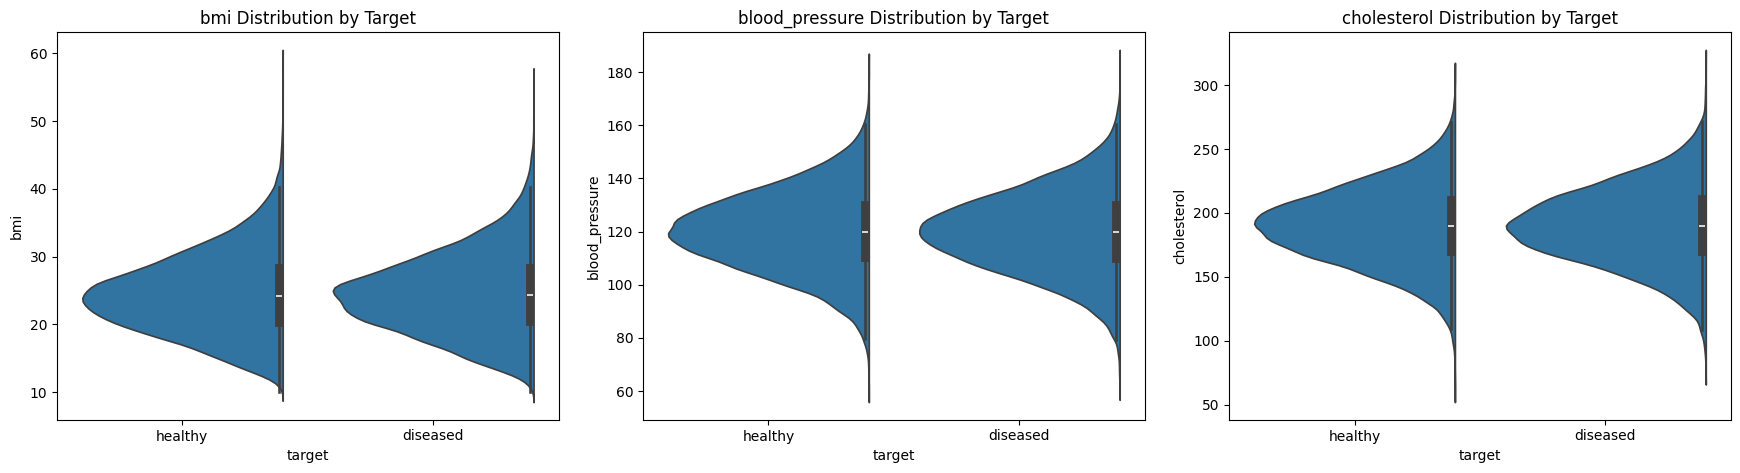

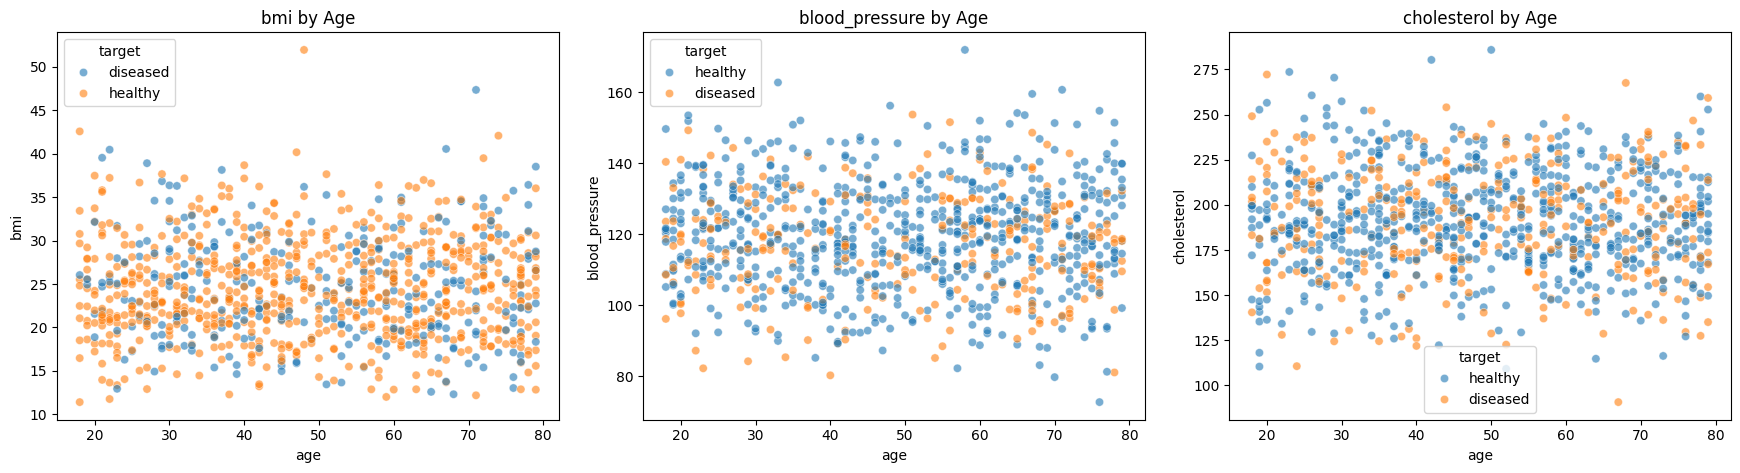

In [27]:
health_metrics = ['bmi', 'blood_pressure', 'cholesterol']

fig, axes = plot_grid(1, 3, figsize=(18, 5))

for i, metric in enumerate(health_metrics):
    sns.violinplot(x='target', y=metric, data=df, ax=axes[i], split=True)
    axes[i].set_title(f'{metric} Distribution by Target')
    
plt.show()

# Age trends for key metrics
fig, axes = plot_grid(1, 3, figsize=(18, 5))

for i, metric in enumerate(health_metrics):
    sns.scatterplot(x='age', y=metric, data=df.sample(1000), hue='target', alpha=0.6, ax=axes[i])
    axes[i].set_title(f'{metric} by Age')
    
plt.show()

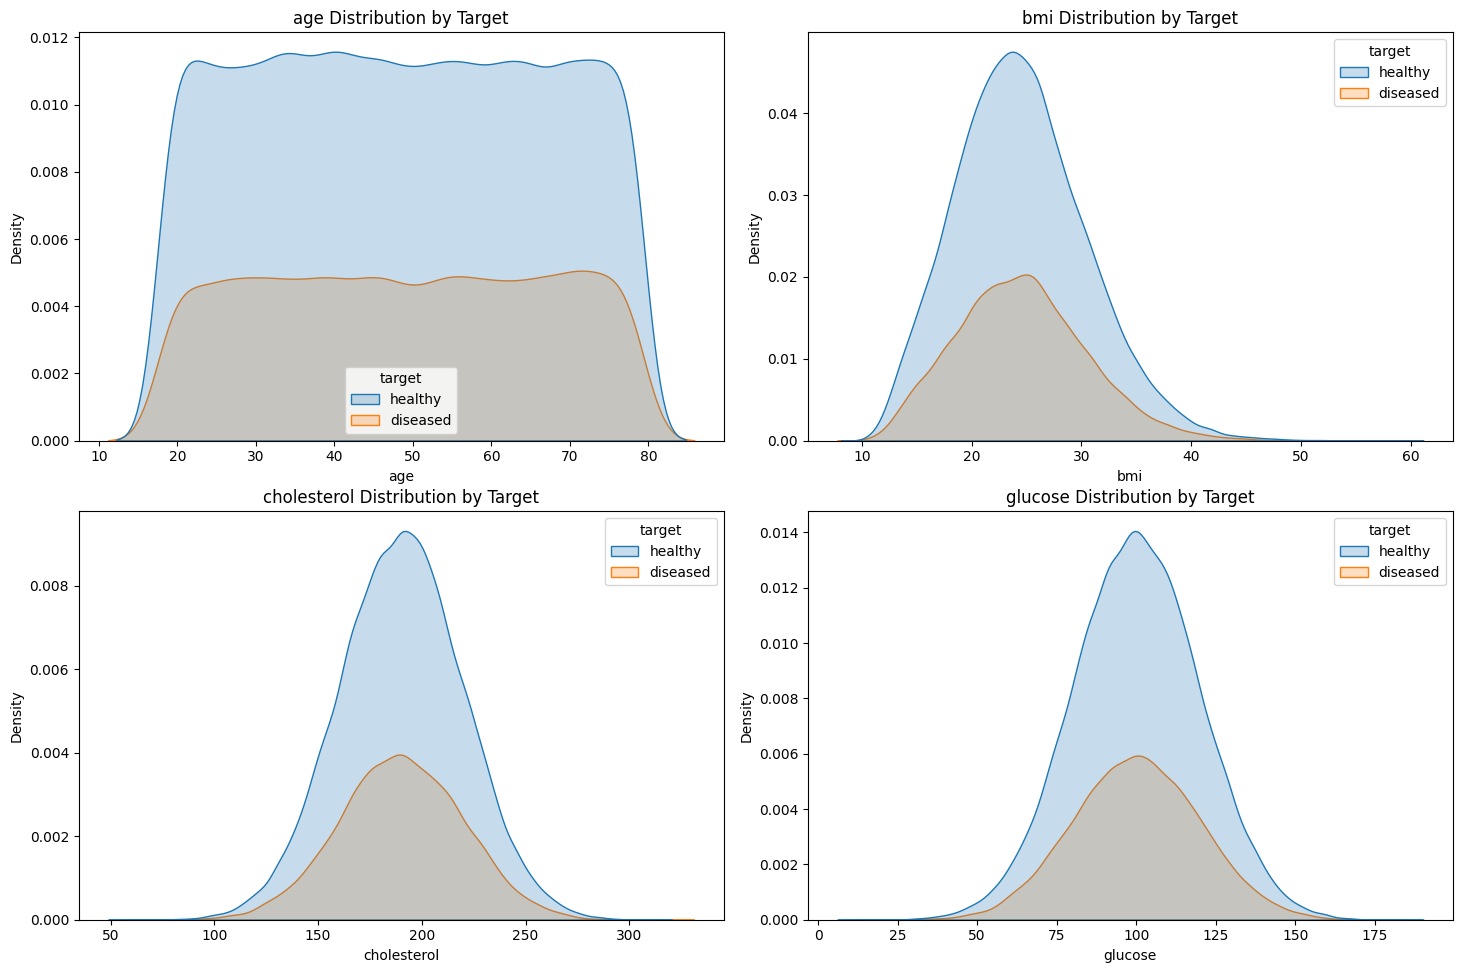

In [29]:
fig, axes = plot_grid(2, 2, figsize=(15, 10))

features_to_plot = ['age', 'bmi', 'cholesterol', 'glucose']

for i, feature in enumerate(features_to_plot):
    row = i // 2
    col = i % 2
    sns.kdeplot(data=df, x=feature, hue='target', fill=True, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} Distribution by Target')
    
plt.show()